<a href="https://colab.research.google.com/github/ayshahaneena/Breast-Cancer-Classification-Using-Neural-Network/blob/main/DL_Breast_Cancer_Classificarion_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Breast Cancer Classification Using Neural network**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
dataset = sklearn.datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# converting dataset into pandas dataframe
df = pd.DataFrame(dataset.data , columns=dataset.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Adding labell values into dataframe
df['label'] = dataset.target

In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
df.shape

(569, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

0 --> Benign

1`--> Malignant

In [10]:
# seperating Features and Targets
x = df.drop(columns='label' , axis=1)
y = df['label']

In [11]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [21]:
print(x)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [12]:
# Train - Test Split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

print(x.shape , x_train.shape , x_test.shape)

(569, 30) (455, 30) (114, 30)


**Build Neural Network**

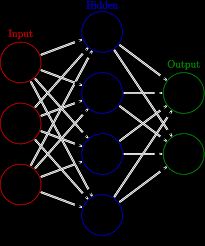

In [13]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)  # This can help ensure reproducibility ( you'll get the same numbers generated )

In [14]:
# Setting up the layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape= (30,)),
    keras.layers.Dense(20 , activation= 'relu'),
    keras.layers.Dense(2, activation= 'sigmoid')
])
# compiling the neural network

model.compile(optimizer= 'adam' ,
              loss= 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy']
    )
# Training the neural network
trained = model.fit(x_train , y_train , validation_split= 0.1 , epochs= 10 )

Epoch 1/10
13/13 [==============================] - 2s 41ms/step - loss: 0.4573 - accuracy: 0.7824 - val_loss: 0.3503 - val_accuracy: 0.8913
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 0.3311 - accuracy: 0.8411 - val_loss: 0.2560 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 0.2522 - accuracy: 0.8826 - val_loss: 0.2066 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 15ms/step - loss: 0.2058 - accuracy: 0.9071 - val_loss: 0.1789 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 11ms/step - loss: 0.1757 - accuracy: 0.9218 - val_loss: 0.1606 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1545 - accuracy: 0.9462 - val_loss: 0.1495 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 17ms/step - loss: 0.1391 - accuracy: 0.9535 - val_loss: 0.1404 - val_accuracy: 0.9565
Epoch 8/10
13

**Visualizing Accuracy and Loss**

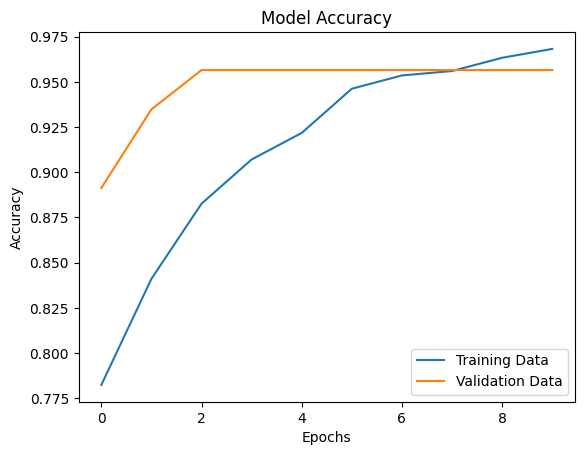

In [15]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Data' , 'Validation Data'])
plt.show()


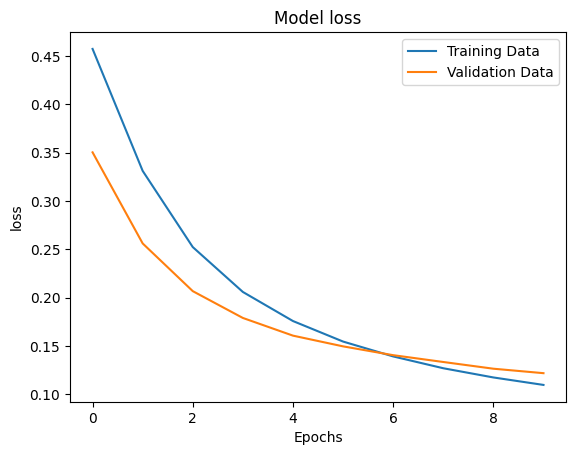

In [16]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Training Data' , 'Validation Data'])
plt.show()

In [17]:
loss , accuracy = model.evaluate(x_test , y_test)

4/4 [==============================] - 0s 13ms/step - loss: 0.1498 - accuracy: 0.9298


In [18]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 6ms/step


In [19]:
y_pred.shape

(114, 2)

In [20]:
print(y_pred)

[[0.54415846 0.621317  ]
 [0.63325894 0.5091297 ]
 [0.18089764 0.99533075]
 [0.99736655 0.01532574]
 [0.5056859  0.637629  ]
 [0.97727805 0.05515146]
 [0.50250614 0.87842405]
 [0.12369338 0.9909166 ]
 [0.1666123  0.96393484]
 [0.2378681  0.9442331 ]
 [0.401429   0.6114365 ]
 [0.2164083  0.9690746 ]
 [0.5131874  0.815034  ]
 [0.32630125 0.7932541 ]
 [0.2646074  0.9703955 ]
 [0.8008685  0.37161362]
 [0.20208739 0.9880187 ]
 [0.27559638 0.95137924]
 [0.36462098 0.9617745 ]
 [0.9828498  0.06610741]
 [0.19789131 0.95347536]
 [0.23410933 0.99106306]
 [0.21912679 0.9655311 ]
 [0.12713178 0.984566  ]
 [0.3612667  0.76338   ]
 [0.9436425  0.10473579]
 [0.2723332  0.9326579 ]
 [0.3564651  0.71952677]
 [0.9220894  0.1321892 ]
 [0.9417541  0.1126724 ]
 [0.20551465 0.9315801 ]
 [0.20374133 0.9382903 ]
 [0.26842633 0.977303  ]
 [0.9922917  0.02503744]
 [0.9708629  0.05561372]
 [0.4915497  0.94979805]
 [0.14553383 0.9920675 ]
 [0.28393388 0.92068523]
 [0.11035984 0.98533297]
 [0.20001335 0.96998924]


model.predict() gives predicton probability of each class ( 0 or 1 )

In [23]:
# converting prediction probability into class labels
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
